## K-Means Clustering with Tensorflow

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
print(tf.version)

<module 'tensorflow_core._api.v2.version' from '/home/aswin/anaconda3/lib/python3.7/site-packages/tensorflow_core/_api/v2/version/__init__.py'>


**Importing the dataset**

In [12]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We dont require the CustomerID section for our purpose

In [13]:
df.drop(labels=['CustomerID'],axis=1,inplace=True)

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
def changeGender(x):
    if(x=='Male'): 
        return 0
    return 1

df['Gender'] = df['Gender'].apply(changeGender)

In [17]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [18]:
df['Gender'].unique()

array([0, 1])

No. of Male and Female

In [26]:
df['Gender'].value_counts()

1    112
0     88
Name: Gender, dtype: int64

So we have 112 Females and 88 Males

**Plotting scatter plots**

### Age vs Annual Income

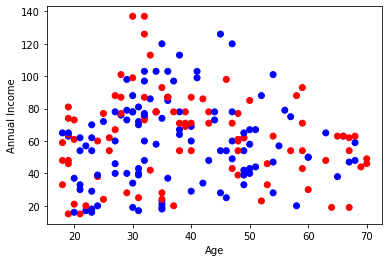

In [38]:
colors = ['red','blue']

plt.scatter(df['Age'],df['Annual Income (k$)'],c=df['Gender'].apply(lambda x:colors[x]))
plt.ylabel('Annual Income')
plt.xlabel('Age')
plt.show()

**Red Denotes Male and Blue Represents Female**

### Age vs Spending score


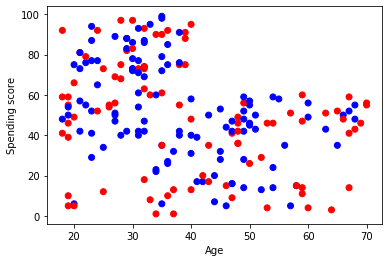

In [42]:
colors = ['red','blue']

plt.scatter(df['Age'],df['Spending Score (1-100)'],c=df['Gender'].apply(lambda x:colors[x]))
plt.ylabel('Spending score')
plt.xlabel('Age')
plt.show()

### Annual Income vs Spending score


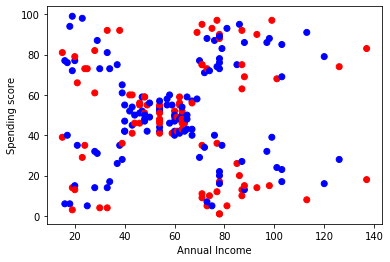

In [43]:
colors = ['red','blue']

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df['Gender'].apply(lambda x:colors[x]))
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

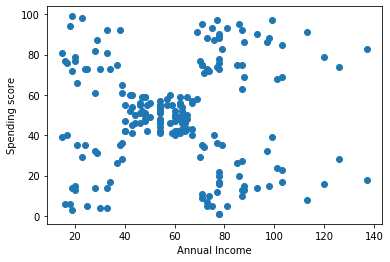

In [44]:

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.show()

## Building the model

In [45]:
from tensorflow_estimator.python.estimator.canned import kmeans as kmeans_lib

In [47]:
x = df.iloc[:,2:]

In [48]:
x.shape

(200, 2)

In [49]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [82]:
def input_fn():
    return tf.compat.v1.train.limit_epochs(tf.convert_to_tensor(x.to_numpy(),dtype=tf.float32),num_epochs=2)

In [83]:
num_clusters = 6
kmeans = tf.compat.v1.estimator.experimental.KMeans(
    num_clusters=num_clusters,
    use_mini_batch=False,
    seed=100,
    initial_clusters=kmeans_lib.KMeansClustering.KMEANS_PLUS_PLUS_INIT
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbhgzs3aj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe21d8242e8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Training

In [84]:
num_iterations = 10
previous_centers = None

for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    
    if previous_centers is not None:
        print('delta: ',cluster_centers-previous_centers)
    previous_centers = cluster_centers
    print('Score: ',kmeans.score(input_fn))
print('cluster centers: ',cluster_centers)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbhgzs3aj/model.ckpt.
INFO:tensorflow:loss = 52699.0, step = 1
INFO:tensorflow:Saving checkpoints for 2 into /tmp/tmpbhgzs3aj/model.ckpt.
INFO:tensorflow:Loss for final step: 52699.0.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T20:44:34Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbhgzs3aj/model.ckpt-2
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-08-20-20:44:34
INFO:tensorflow:Saving dict for global step 2: global_step = 2, loss = 40481.258, score = 40481.258
INFO:tens

delta:  [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-08-20T20:44:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbhgzs3aj/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2020-08-20-20:44:41
INFO:tensorflow:Saving dict for global step 20: global_step = 20, loss = 37456.023, score = 37456.023
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20: /tmp/tmpbhgzs3aj/model.ckpt-20
Score:  37456.023
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbhgzs3aj/model.ckpt-20
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running loca

In [85]:
cluster_indices = list(kmeans.predict_cluster_index(input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpbhgzs3aj/model.ckpt-29
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


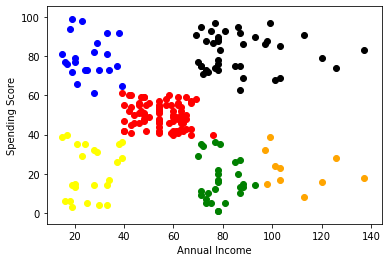

In [87]:
colors = ['red','green','black','yellow','orange','blue']

for i,feature in enumerate(x.to_numpy()):
    cluster_index = cluster_indices[i]
    center = cluster_centers[cluster_index]
    plt.scatter(feature[0],feature[1],c=colors[cluster_index])
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    
plt.show()